In [181]:
import pandas as pd
import numpy as np
import os
import requests
from io import BytesIO
import tweepy
import re
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Gathering

In [182]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [183]:
folder_name ='files'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [184]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
     file.write(r.content)

In [185]:
df2 = pd.read_csv('files/image-predictions.tsv',sep = '\s+')

In [ ]:
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue
            
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()


tweet_info = pd.DataFrame()


tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [186]:
df3list = []
with open ('tweet-json.txt',"r") as jfile:
    for l in jfile:
        dic = {}
        data=json.loads(l)
        dic['id'] = data['id']
        dic['favoriteCount'] = data['favorite_count']
        dic['retweetCount'] = data['retweet_count']
        dic['followersCount'] = data['user']['followers_count']
        df3list.append(dic)
print(data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [187]:
df3 = pd.DataFrame(df3list,columns = ['id','retweetCount','favoriteCount','followersCount',])
df3.to_csv('file3.csv')
df3.to_csv('file3.csv')
df3 = pd.read_csv('file3.csv')

# Assesment

In [188]:
df1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None


In [189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [190]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [191]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,0.868658,True,Irish_terrier,0.027587,True,otterhound,0.025324,True
1255,748346686624440324,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,1,borzoi,0.596455,True,whippet,0.231428,True,Saluki,0.058261,True
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
1568,794332329137291264,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,1,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False
147,668631377374486528,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1,miniature_schnauzer,0.904549,True,Australian_terrier,0.022529,True,silky_terrier,0.015243,True


In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [193]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [194]:
df3.sample(10)

,Unnamed: 0,id,retweetCount,favoriteCount,followersCount
298,298,836989968035819520,2610,13879,3200891
1428,1428,697575480820686848,572,2250,3200950
406,406,823699002998870016,2772,13826,3200894
2303,2303,666837028449972224,584,857,3201018
1899,1899,674646392044941312,557,1533,3201003
1127,1127,729463711119904772,2586,6340,3200944
1739,1739,679475951516934144,728,2304,3200953
1569,1569,687704180304273409,950,2660,3200951
1828,1828,676219687039057920,31989,67100,3201002
1177,1177,719367763014393856,827,3022,3200945


In [195]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      2354 non-null   int64
 1   id              2354 non-null   int64
 2   retweetCount    2354 non-null   int64
 3   favoriteCount   2354 non-null   int64
 4   followersCount  2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


In [196]:
df3.describe()

,Unnamed: 0,id,retweetCount,favoriteCount,followersCount
count,2354.000000,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,1176.500000,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,679.685589,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,0.000000,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,588.250000,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,1176.500000,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,1764.750000,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,2353.000000,8.924206e+17,79515.000000,132810.000000,3.201018e+06


### (8) data quality issues 

-change datatype for the tweet_id to string since we wont do calculation using them

-drop retweets rows.

-drop column related to retweets or replies info like retweeted_status_id,	retweeted_status_user_id, tweet_id, in_reply_to_status_id, in_reply_to_user_id,	and retweeted_status_timestamp.

-change timestamp into time.

-remove invalid names with lowercase

-drop rows without dog_stage

-change data type of rating_numerator and rating_denominator-rating_numerator should be a float

-change rating_denominator that are less that 10

### (2) tidiness issues are detected

-join the columns of doggo,	floofer, pupper, and	puppo into type.

-join tables together


# Cleaning

In [197]:
#copying data into new dfs
df1_clean= df1.copy()
df2_clean= df2.copy()
df3_clean= df3.copy()

**(untidy)**(1) join the types of the dog into dog_type

In [198]:
# handle none
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# merge into column
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

# handle multiple stages
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df1_clean.loc[df1_clean.dog_stage == '', 'dog_stage'] = np.nan

In [199]:
#test
df1_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,,,pupper,,pupper
1567,687826841265172480,NaN,NaN,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,,,,,NaN
1083,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,,,,puppo,puppo
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,,,,,NaN
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,,,,,NaN
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,None,,,,,NaN
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,,,,,NaN
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,,,,,NaN
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611...,12,10,None,,,pupper,,pupper
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,,,,,NaN


In [200]:
df1_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

1- change rating_denominator that are less that 10

In [201]:
(df1_clean['rating_denominator']!=10).sum()

23

In [202]:
#code
df1_clean.loc[df1_clean.rating_denominator != 10, "rating_denominator"] = 10
#test
(df1_clean['rating_denominator']!=10).sum()

0

2- change datatype for the tweet_id to string since we wont do calculation using them

In [203]:
#code
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)
df3_clean['id'] = df3_clean['id'].astype(str)

In [204]:
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [205]:
#test
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [206]:
#test
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2354 non-null   int64 
 1   id              2354 non-null   object
 2   retweetCount    2354 non-null   int64 
 3   favoriteCount   2354 non-null   int64 
 4   followersCount  2354 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


3- remove retweets rows

In [207]:
df1_clean['retweeted_status_user_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

In [208]:
#code
df1_clean=df1_clean[pd.isnull(df1_clean['retweeted_status_user_id'])]

In [209]:
#test
df1_clean['retweeted_status_user_id'].isnull().value_counts()

True    2175
Name: retweeted_status_user_id, dtype: int64

4- drop irrelevant columns

In [210]:
#code
df1_clean=df1_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_id',
                                                    'floofer',
                                                    'doggo',
                                                    'pupper',
                                                    'puppo',
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [211]:
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   dog_stage           344 non-null    object
dtypes: int64(2), object(5)
memory usage: 135.9+ KB


5- change datatype of timestamp

In [212]:
#code
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 135.9+ KB


6-drop rows with invalid names

In [213]:
lower = df1_clean[df1_clean.name.str.islower()].index
lower

Int64Index([  22,   56,  169,  193,  335,  369,  542,  649,  801,  819,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=104)

In [214]:
#code
df1_clean=df1_clean.drop(lower)

In [215]:
#test
df1_clean.name.str.islower().value_counts()

False    2071
Name: name, dtype: int64

7-drop rows without dog_stage

In [216]:
(df1_clean['dog_stage'].isnull()).value_counts()

True     1741
False     330
Name: dog_stage, dtype: int64

In [217]:
#code
index_arr=df1_clean[df1_clean['dog_stage'].isnull()].index
df1_clean=df1_clean.drop(index_arr)

In [218]:
#test
(df1_clean['dog_stage']=='NaN').value_counts()

False    330
Name: dog_stage, dtype: int64

unfiy tweet_id column across tables

In [219]:
#code
df3_clean=df3_clean.rename(columns={'id':'tweet_id'})

In [220]:
#test
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2354 non-null   int64 
 1   tweet_id        2354 non-null   object
 2   retweetCount    2354 non-null   int64 
 3   favoriteCount   2354 non-null   int64 
 4   followersCount  2354 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


drop Unnamed: 0 column

In [221]:
#code
df3_clean=df3_clean.drop(['Unnamed: 0'],1)

In [222]:
#test
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweetCount    2354 non-null   int64 
 2   favoriteCount   2354 non-null   int64 
 3   followersCount  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


8- change data type of 	rating_numerator and rating_denominator

In [223]:
#code
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype(float)
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 9 to 2017
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            330 non-null    object             
 1   timestamp           330 non-null    datetime64[ns, UTC]
 2   text                330 non-null    object             
 3   rating_numerator    330 non-null    float64            
 4   rating_denominator  330 non-null    int64              
 5   name                330 non-null    object             
 6   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 20.6+ KB


In [224]:
#code
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].astype(float)
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 9 to 2017
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            330 non-null    object             
 1   timestamp           330 non-null    datetime64[ns, UTC]
 2   text                330 non-null    object             
 3   rating_numerator    330 non-null    float64            
 4   rating_denominator  330 non-null    float64            
 5   name                330 non-null    object             
 6   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 20.6+ KB


In [225]:
JoinedData = pd.merge(df1_clean,df2_clean,how='inner',on='tweet_id').merge(df3_clean,how='left',on='tweet_id')

In [226]:
JoinedData=JoinedData.dropna()

In [227]:
JoinedData

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweetCount,favoriteCount,followersCount
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,3200889
1,889665388333682689,2017-07-25 01:55:32+00:00,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,...,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,38818,3200889
2,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,...,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359,3200889
3,886366144734445568,2017-07-15 23:25:31+00:00,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,...,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,3316,21524,3200890
4,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,...,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771,3200890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,672594978741354496,2015-12-04 01:55:13+00:00,Meet Scott. Just trying to catch his train to ...,9.0,10.0,Scott,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,...,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True,661,1411,3201005
290,672481316919734272,2015-12-03 18:23:34+00:00,Say hello to Jazz. She should be on the cover ...,12.0,10.0,Jazz,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,...,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True,137,757,3201006
291,672254177670729728,2015-12-03 03:21:00+00:00,This is Rolf. He's having the time of his life...,11.0,10.0,Rolf,pupper,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,...,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True,800,1515,3201006
292,672205392827572224,2015-12-03 00:07:09+00:00,This is Opal. He's a Royal John Coctostan. Rea...,9.0,10.0,Opal,pupper,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,...,False,crate,0.035376,False,pug,0.003267,True,1270,2414,3201006


In [228]:
JoinedData.to_csv('finalDataset.csv', index=False)

In [229]:
ordered=JoinedData.sort_values(by=['rating_numerator'],ascending=False)
ordered

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweetCount,favoriteCount,followersCount
93,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320,3200810
0,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,3200889
21,854120357044912130,2017-04-17 23:52:16+00:00,Sometimes you guys remind me just how impactfu...,14.0,10.0,None,pupper,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,...,True,Doberman,0.050792,True,bluetick,0.021762,True,8285,33911,3200892
82,794205286408003585,2016-11-03 15:51:10+00:00,This is Laika. She was a space pupper. The fir...,14.0,10.0,Laika,pupper,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,...,False,fountain,0.294827,False,brass,0.020371,False,3895,10314,3200900
69,807621403335917568,2016-12-10 16:22:02+00:00,This is Ollie Vue. He was a 3 legged pupper on...,14.0,10.0,Ollie,pupper,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,...,True,cocker_spaniel,0.033693,True,chow,0.020408,True,4288,16236,3200896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,685641971164143616,2016-01-09 01:59:19+00:00,This is Otis. He just passed a cop while going...,7.0,10.0,Otis,pupper,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,...,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False,885,3218,3200950
288,672614745925664768,2015-12-04 03:13:46+00:00,This is Norman. Doesn't bark much. Very docile...,6.0,10.0,Norman,pupper,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,...,False,goldfish,0.258865,False,sea_cucumber,0.002015,False,644,1302,3201005
224,684880619965411328,2016-01-06 23:33:58+00:00,Here we have a basking dino pupper. Looks powe...,5.0,10.0,None,pupper,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,...,False,spindle,0.066957,False,agama,0.060884,False,936,2305,3200950
117,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,5.0,10.0,None,"doggo, pupper",https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,1265,4849,3200943


In [230]:
ordered.iloc[0]

tweet_id                                             778027034220126208
timestamp                                     2016-09-20 00:24:34+00:00
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
rating_numerator                                                     27
rating_denominator                                                   10
name                                                             Sophie
dog_stage                                                        pupper
jpg_url                 https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
img_num                                                               1
p1                                                              clumber
p1_conf                                                        0.946718
p1_dog                                                             True
p2                                                       cocker_spaniel
p2_conf                                                       0.

In [239]:
ordered.iloc[293]

tweet_id                                             693590843962331137
timestamp                                     2016-01-31 00:25:18+00:00
text                  Meet Phil. He's big af. Currently destroying t...
rating_numerator                                                      3
rating_denominator                                                   10
name                                                               Phil
dog_stage                                                        pupper
jpg_url                 https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg
img_num                                                               1
p1                                                         dining_table
p1_conf                                                        0.383448
p1_dog                                                            False
p2                                                             grey_fox
p2_conf                                                        0

In [232]:
Rtordered=JoinedData.sort_values(by=['retweetCount'],ascending=False)
Rtordered

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweetCount,favoriteCount,followersCount
131,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,...,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075,3200943
138,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,52360,75163,3200943
50,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810,3200894
58,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14...,14.0,10.0,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,...,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,42228,95450,3200894
17,866450705531457537,2017-05-22 00:28:40+00:00,This is Jamesy. He gives a kiss to every other...,13.0,10.0,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,...,True,Boston_bull,0.078060,True,pug,0.001771,True,32883,106827,3200891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,672988786805112832,2015-12-05 04:00:04+00:00,This is Schnozz. He's had a blurred tail since...,10.0,10.0,Schnozz,pupper,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,...,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True,314,1039,3201005
277,673656262056419329,2015-12-07 00:12:23+00:00,This is Albert AKA King Banana Peel. He's a ki...,10.0,10.0,Albert,pupper,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,...,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True,265,769,3201004
266,675006312288268288,2015-12-10 17:37:00+00:00,Say hello to Mollie. This pic was taken after ...,10.0,10.0,Mollie,pupper,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,...,True,space_heater,0.043389,False,beagle,0.042848,True,252,1057,3201003
290,672481316919734272,2015-12-03 18:23:34+00:00,Say hello to Jazz. She should be on the cover ...,12.0,10.0,Jazz,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,...,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True,137,757,3201006


In [243]:
Rtordered.iloc[0]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_retriever
p1_conf                                                        0.825333
p1_dog                                                             True
p2                                                             ice_bear
p2_conf                                                       0.

In [240]:
Rtordered.iloc[293]

tweet_id                                             674737130913071104
timestamp                                     2015-12-09 23:47:22+00:00
text                  Meet Rufio. He is unaware of the pink legless ...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                              Rufio
dog_stage                                                        pupper
jpg_url                 https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg
img_num                                                               1
p1                                                           Pomeranian
p1_conf                                                        0.948537
p1_dog                                                             True
p2                                                           schipperke
p2_conf                                                       0.

In [235]:
df_dog_type_mean = JoinedData.groupby('dog_stage').mean()
df_dog_type_mean

,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweetCount,favoriteCount,followersCount
dog_stage,,,,,,,,,,,,
doggo,11.885246,10.0,1.295082,0.575575,0.786885,0.157944,0.803279,0.060017,0.737705,7233.885246,19616.081967,3.200908e+06
"doggo, floofer",11.000000,10.0,1.000000,0.354733,1.000000,0.177538,1.000000,0.131706,1.000000,3433.000000,17169.000000,3.200892e+06
"doggo, pupper",10.875000,10.0,1.125000,0.832213,0.875000,0.086636,0.750000,0.026911,0.625000,4153.875000,12807.000000,3.200910e+06
"doggo, puppo",13.000000,10.0,1.000000,0.321676,1.000000,0.115138,1.000000,0.096100,1.000000,19196.000000,47844.000000,3.200891e+06
floofer,12.000000,10.0,1.142857,0.609204,1.000000,0.155319,1.000000,0.047997,0.857143,4968.714286,13206.000000,3.200924e+06
pupper,10.695876,10.0,1.262887,0.613689,0.701031,0.128085,0.731959,0.055717,0.701031,2343.634021,7138.984536,3.200949e+06
puppo,12.000000,10.0,1.454545,0.722293,0.863636,0.135468,0.909091,0.043701,0.954545,6473.954545,21582.090909,3.200908e+06


Text(0, 0.5, 'Mean of retweet count')

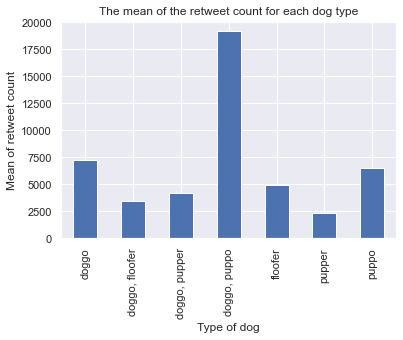

In [236]:
df_dog_type_mean['retweetCount'].plot(kind = 'bar')
plt.title('The mean of the retweet count for each dog type')
plt.xlabel('Type of dog')
plt.ylabel('Mean of retweet count')

Text(0, 0.5, 'Mean of favorite count')

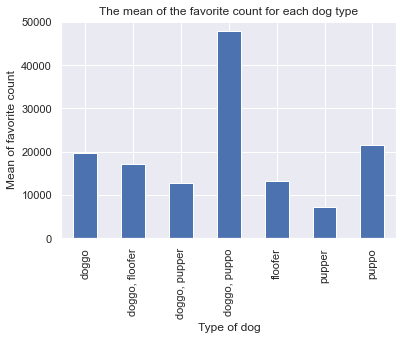

In [237]:
df_dog_type_mean['favoriteCount'].plot(kind = 'bar')
plt.title('The mean of the favorite count for each dog type')
plt.xlabel('Type of dog')
plt.ylabel('Mean of favorite count')

Text(0, 0.5, 'Mean')

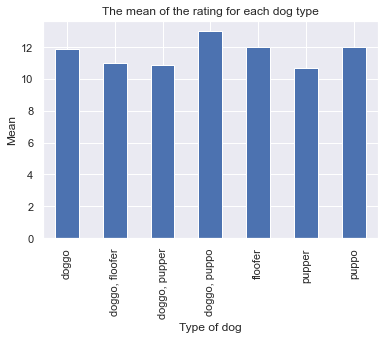

In [238]:
df_dog_type_mean['rating_numerator'].plot(kind = 'bar')
plt.title('The mean of the rating for each dog type')
plt.xlabel('Type of dog')
plt.ylabel('Mean')